In [ ]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:

raw_df = pd.read_csv("data_asia.csv")
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,41128771.0,20362329.0,20766442.0,None,None,9.0,None,None,None,None,...,None,None,None,None,None,None,None,None,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,None,None,None,None,...,17.86,None,58.915,65.279,None,None,None,55.9294013977051,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.48131,45.98341,53.91368,26.41834,...,17.58,None,59.866,65.432,None,10.8584403991699,None,None,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.33941,44.51263,59.36147,24.07933,...,18.51,None,60.619,66.677,110.007507324219,None,86.1755218505859,None,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.12015,44.39712,63.66947,23.55313,...,17.96,None,59.923,66.458,107.780532836914,9.96378993988037,88.7355194091797,None,2018,Afghanistan


In [ ]:

shape = raw_df.shape
print(f"Current shape: {shape}")

if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

Current shape: (1316, 26)
Your data good!.


In [ ]:

index = raw_df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


In [ ]:
# De-deduplicate your raw data
# Get the index of the DataFrame
index = raw_df.index

# Detect duplicate rows and keep the first occurrence
detectDupSeries = index.duplicated(keep='first')

# Count the number of duplicated rows
num_duplicated_rows = detectDupSeries.sum()

# TEST
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


In [ ]:
# fix convert dtype
float_columns = raw_df.columns.difference(['Year', 'Country'])
for column in float_columns:
    raw_df[column] = pd.to_numeric(raw_df[column], errors='coerce')

In [ ]:
dtypes = raw_df.dtypes
dtypes

Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

In [ ]:
raw_df["Year"] = raw_df["Year"].astype(str)
dtypes = raw_df.dtypes
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert len(float_cols) == 24
object_cols = set(dtypes[dtypes == object].index)
assert len(object_cols) == 2

In [ ]:
num_col_info_df = raw_df.select_dtypes(exclude='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
missing_ratio,0.000000e+00,0.0,0.0,3.600,3.600,20.9,3.700000,3.70000,3.700000,3.700000,...,7.700000e+00,34.300000,6.80,38.5,3.600,3.600,23.900000,30.200000,43.600000,79.700000
min,2.582080e+05,124951.0,133257.0,5.100,0.795,5.0,3.519346,0.32473,0.007847,1.773412,...,4.972527e+07,13.187383,0.00,0.0,51.039,54.087,22.162991,0.212900,17.885321,46.990051
lower_quartile,4.382818e+06,2121473.0,2311564.5,15.100,4.800,8.0,16.200000,6.10000,3.100000,7.800000,...,8.504446e+08,723.300000,1.00,63.6,64.400,70.100,96.700000,14.800000,90.200000,94.600000
median,1.822701e+07,9013541.5,9061772.5,19.800,6.200,9.0,21.000000,29.10000,30.100000,11.900000,...,3.638505e+09,1814.500000,5.30,90.1,68.500,74.700,100.900000,28.800000,96.600000,98.700000
upper_quartile,6.135766e+07,30517285.0,30801407.8,24.600,7.600,10.0,25.800000,45.40000,52.200000,16.200000,...,2.134342e+10,5101.600000,35.80,98.2,73.300,78.400,106.800000,46.700000,100.400000,99.700000
max,1.417173e+09,691528501.0,731180498.0,52.073,16.700,15.0,59.578700,85.41296,89.413740,39.333190,...,1.311311e+12,21230.075563,94.37,100.0,83.100,87.710,150.354233,125.763786,134.545609,100.000000


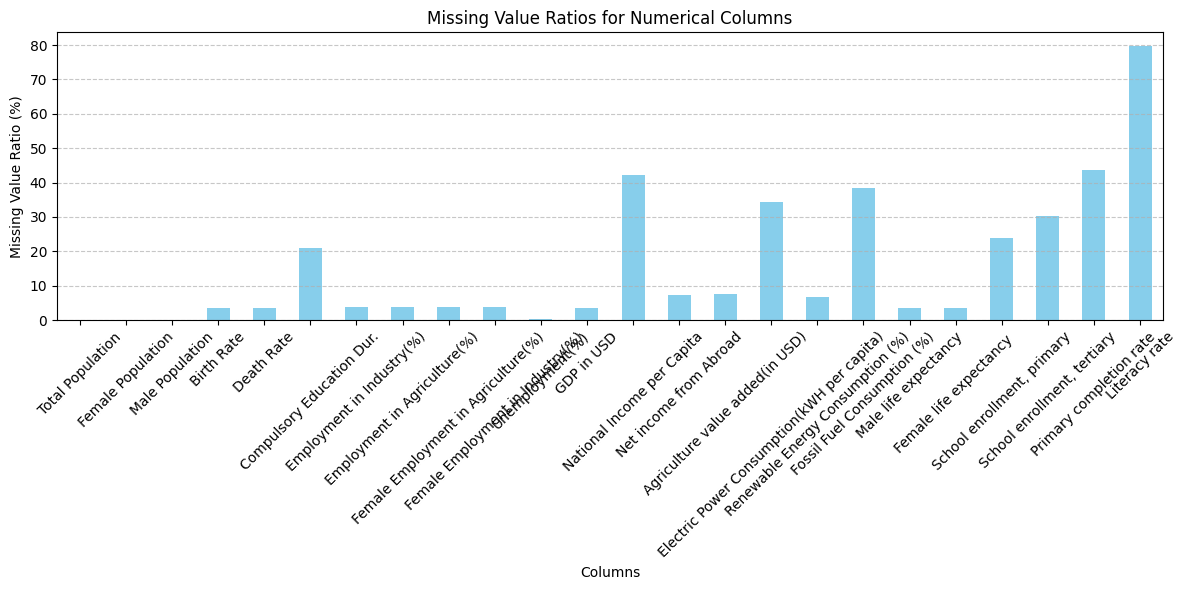

In [ ]:
plt.figure(figsize=(12, 6))
missing_ratios = num_col_info_df.loc['missing_ratio']
missing_ratios.plot(kind='bar', color='skyblue')
plt.title('Missing Value Ratios for Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
assert num_col_info_df["Total Population"]["missing_ratio"] == 0
dict(num_col_info_df.iloc[0])

{'Total Population': 0.0,
 'Female Population': 0.0,
 'Male Population': 0.0,
 'Birth Rate': 3.6,
 'Death Rate': 3.6,
 'Compulsory Education Dur.': 20.9,
 'Employment in Industry(%)': 3.7,
 'Employment in Agriculture(%)': 3.7,
 'Female Employment in Agriculture(%)': 3.7,
 'Female Employment in Industry(%)': 3.7,
 'Unemployment(%)': 0.4,
 'GDP in USD': 3.5,
 'National Income per Capita': 42.2,
 'Net income from Abroad': 7.4,
 'Agriculture value added(in USD)': 7.7,
 'Electric Power Consumption(kWH per capita)': 34.3,
 'Renewable Energy Consumption (%)': 6.8,
 'Fossil Fuel Consumption (%)': 38.5,
 'Male life expectancy': 3.6,
 'Female life expectancy ': 3.6,
 'School enrollment, primary': 23.9,
 'School enrollment, tertiary': 30.2,
 'Primary completion rate': 43.6,
 'Literacy rate': 79.7}

In [ ]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    df_cp = df.copy()

    cols_to_trim = []

    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)

    if len(cols_to_trim) > 0:
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped column(s): " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no column(s) to trim.")

    return df_cp

In [ ]:
raw_df = drop_missing_features(raw_df, dict(num_col_info_df.iloc[0]))


[LOG] Dropped column(s): Literacy rate


In [ ]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,NaN,NaN,NaN,NaN,...,NaN,17.86,NaN,58.915,65.279,NaN,NaN,NaN,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.48131,45.98341,53.91368,26.41834,...,NaN,17.58,NaN,59.866,65.432,NaN,10.85844,NaN,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.33941,44.51263,59.36147,24.07933,...,NaN,18.51,NaN,60.619,66.677,110.007507,NaN,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.12015,44.39712,63.66947,23.55313,...,NaN,17.96,NaN,59.923,66.458,107.780533,9.96379,88.735519,2018,Afghanistan


After remove features which have large missing values, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.

In [ ]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    if (df is None):
        print(f"[LOG] Invalid.")
        raise ValueError

    df_cp = df.copy()


    cols_list = list(df_cp.columns)


    cols_list.remove("Country")
    cols_list.remove("Year")

    df_cp.fillna(value=np.nan, inplace=True)

    for col in cols_list:
        df_cp[col].fillna((df_cp[col].mean()), inplace=True)

    return df_cp


In [ ]:
raw_df = filling_missing_value(df=raw_df)

In [ ]:
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,20.700378,6.343087,9.0,21.36864,28.950359,31.756573,12.92565,...,3671.529455,20.82783,78.362752,68.719252,74.080759,101.511461,33.217823,93.345172,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842000,7.344000,9.0,21.36864,28.950359,31.756573,12.92565,...,3671.529455,17.86000,78.362752,58.915000,65.279000,101.511461,33.217823,93.345172,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051000,7.113000,9.0,18.48131,45.983410,53.913680,26.41834,...,3671.529455,17.58000,78.362752,59.866000,65.432000,101.511461,10.858440,93.345172,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466000,6.791000,9.0,18.33941,44.512630,59.361470,24.07933,...,3671.529455,18.51000,78.362752,60.619000,66.677000,110.007507,33.217823,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927000,6.981000,9.0,18.12015,44.397120,63.669470,23.55313,...,3671.529455,17.96000,78.362752,59.923000,66.458000,107.780533,9.963790,88.735519,2018,Afghanistan


In [ ]:
raw_df.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate
missing_ratio,0.000000e+00,0.0,0.0,0.000,0.000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.00,0.0,0.000,0.000,0.000000,0.000000,0.000000
min,2.582080e+05,124951.0,133257.0,5.100,0.795,5.0,3.519346,0.32473,0.007847,1.773412,...,-1.928439e+11,4.972527e+07,13.187383,0.00,0.0,51.039,54.087,22.162991,0.212900,17.885321
lower_quartile,4.382818e+06,2121473.0,2311564.5,15.300,4.900,8.9,16.300000,6.60000,3.800000,8.000000,...,-2.680425e+09,1.006268e+09,1377.700000,1.20,78.4,64.600,70.300,97.900000,19.700000,93.300000
median,1.822701e+07,9013541.5,9061772.5,20.200,6.300,9.0,21.200000,29.00000,31.500000,12.200000,...,-2.856842e+08,4.952717e+09,3671.500000,7.00,78.4,68.700,74.300,101.500000,33.200000,93.300000
upper_quartile,6.135766e+07,30517285.0,30801407.8,24.300,7.500,9.0,25.500000,44.90000,51.100000,16.000000,...,2.271594e+07,3.033319e+10,3671.500000,33.10,95.3,73.100,78.300,104.800000,38.900000,97.600000
max,1.417173e+09,691528501.0,731180498.0,52.073,16.700,15.0,59.578700,85.41296,89.413740,39.333190,...,2.429854e+11,1.311311e+12,21230.075563,94.37,100.0,83.100,87.710,150.354233,125.763786,134.545609


In [ ]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [ ]:

cat_col_info_df = raw_df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Year,Country
missing_ratio,0.0,0.0
num_values,28,47
value_ratios,"{'2022': 3.6, '2021': 3.6, '1996': 3.6, '1997': 3.6, '1998': 3.6, '1999': 3.6, '2000': 3.6, '200...","{'Afghanistan': 2.1, 'Saudi Arabia': 2.1, 'Maldives': 2.1, 'Mongolia': 2.1, 'Myanmar': 2.1, 'Nep..."


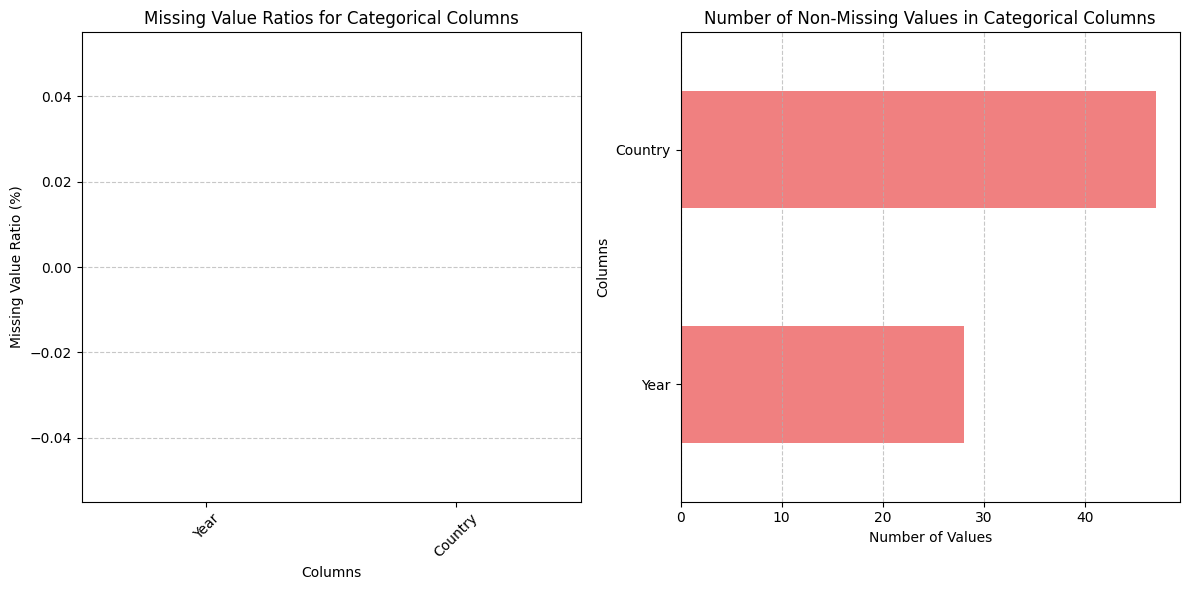

In [ ]:
plt.figure(figsize=(12, 6))

missing_ratios = cat_col_info_df.loc['missing_ratio']
plt.subplot(1, 2, 1)
missing_ratios.plot(kind='bar', color='skyblue')
plt.title('Missing Value Ratios for Categorical Columns')
plt.xlabel('Columns')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

num_non_missing_values = cat_col_info_df.loc['num_values']
plt.subplot(1, 2, 2)
num_non_missing_values.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Number of Non-Missing Values in Categorical Columns')
plt.xlabel('Number of Values')
plt.ylabel('Columns')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
def checking_population(df: pd.DataFrame) -> bool:
    return df["Total Population"].equals((df["Female Population"] + df["Male Population"]))

In [ ]:
checking_population(raw_df) == True

False

In [ ]:
sum(raw_df["Total Population"] - (raw_df["Female Population"] + raw_df["Male Population"]))

-17.0

In [ ]:
raw_df["Female Population"] = raw_df["Total Population"] - raw_df["Male Population"]

In [ ]:
checking_population(raw_df) == True

True

In [ ]:
def checking_population(df: pd.DataFrame) -> bool:

    population_check = df["Total Population"].equals(df["Female Population"] + df["Male Population"])

    if not population_check:
        df["Female Population"] = df["Total Population"] - df["Male Population"]

    return True

is_reasonable = checking_population(raw_df)

if not is_reasonable:
    is_reasonable = checking_population(raw_df)

if is_reasonable:
    print("Population data is reasonable.")
else:
    print("Population data has been corrected.")


Population data is reasonable.


In [ ]:
print(f"Total number of features: {raw_df.shape[1]}")
raw_df.dtypes

Total number of features: 25


Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

In [ ]:
your_continent = "asia"
save_name = "_".join([str(your_continent)]) + "_processed.csv"
raw_df.to_csv(save_name, index=False)

# training model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [ ]:
training_set = raw_df

list_label = training_set['Country'].unique()

training_set['Country'].value_counts()

Afghanistan                  28
Saudi Arabia                 28
Maldives                     28
Mongolia                     28
Myanmar                      28
Nepal                        28
Oman                         28
Pakistan                     28
Philippines                  28
Qatar                        28
Russian Federation           28
Singapore                    28
Lebanon                      28
Sri Lanka                    28
Syrian Arab Republic         28
Tajikistan                   28
Thailand                     28
Turkey                       28
Turkmenistan                 28
United Arab Emirates         28
Uzbekistan                   28
Vietnam                      28
Malaysia                     28
Lao PDR                      28
Armenia                      28
India                        28
Azerbaijan                   28
Bahrain                      28
Bangladesh                   28
Bhutan                       28
Brunei Darussalam            28
Cambodia

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report, y_pred

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [ ]:
# preprocessing data, transform label text to int
label_encoder = LabelEncoder()
X = training_set.drop(['Country'], axis=1)
y = training_set['Country']
y = label_encoder.fit_transform(y)

# device data -> training data, testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# prprocessing data to standard data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Model Accuracy: 0.9696969696969697
Linear Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         9
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.83      0.91         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         7
           9       1.00      0.86      0.92         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5
          15       1.00      0.83      0.91         6
          16     

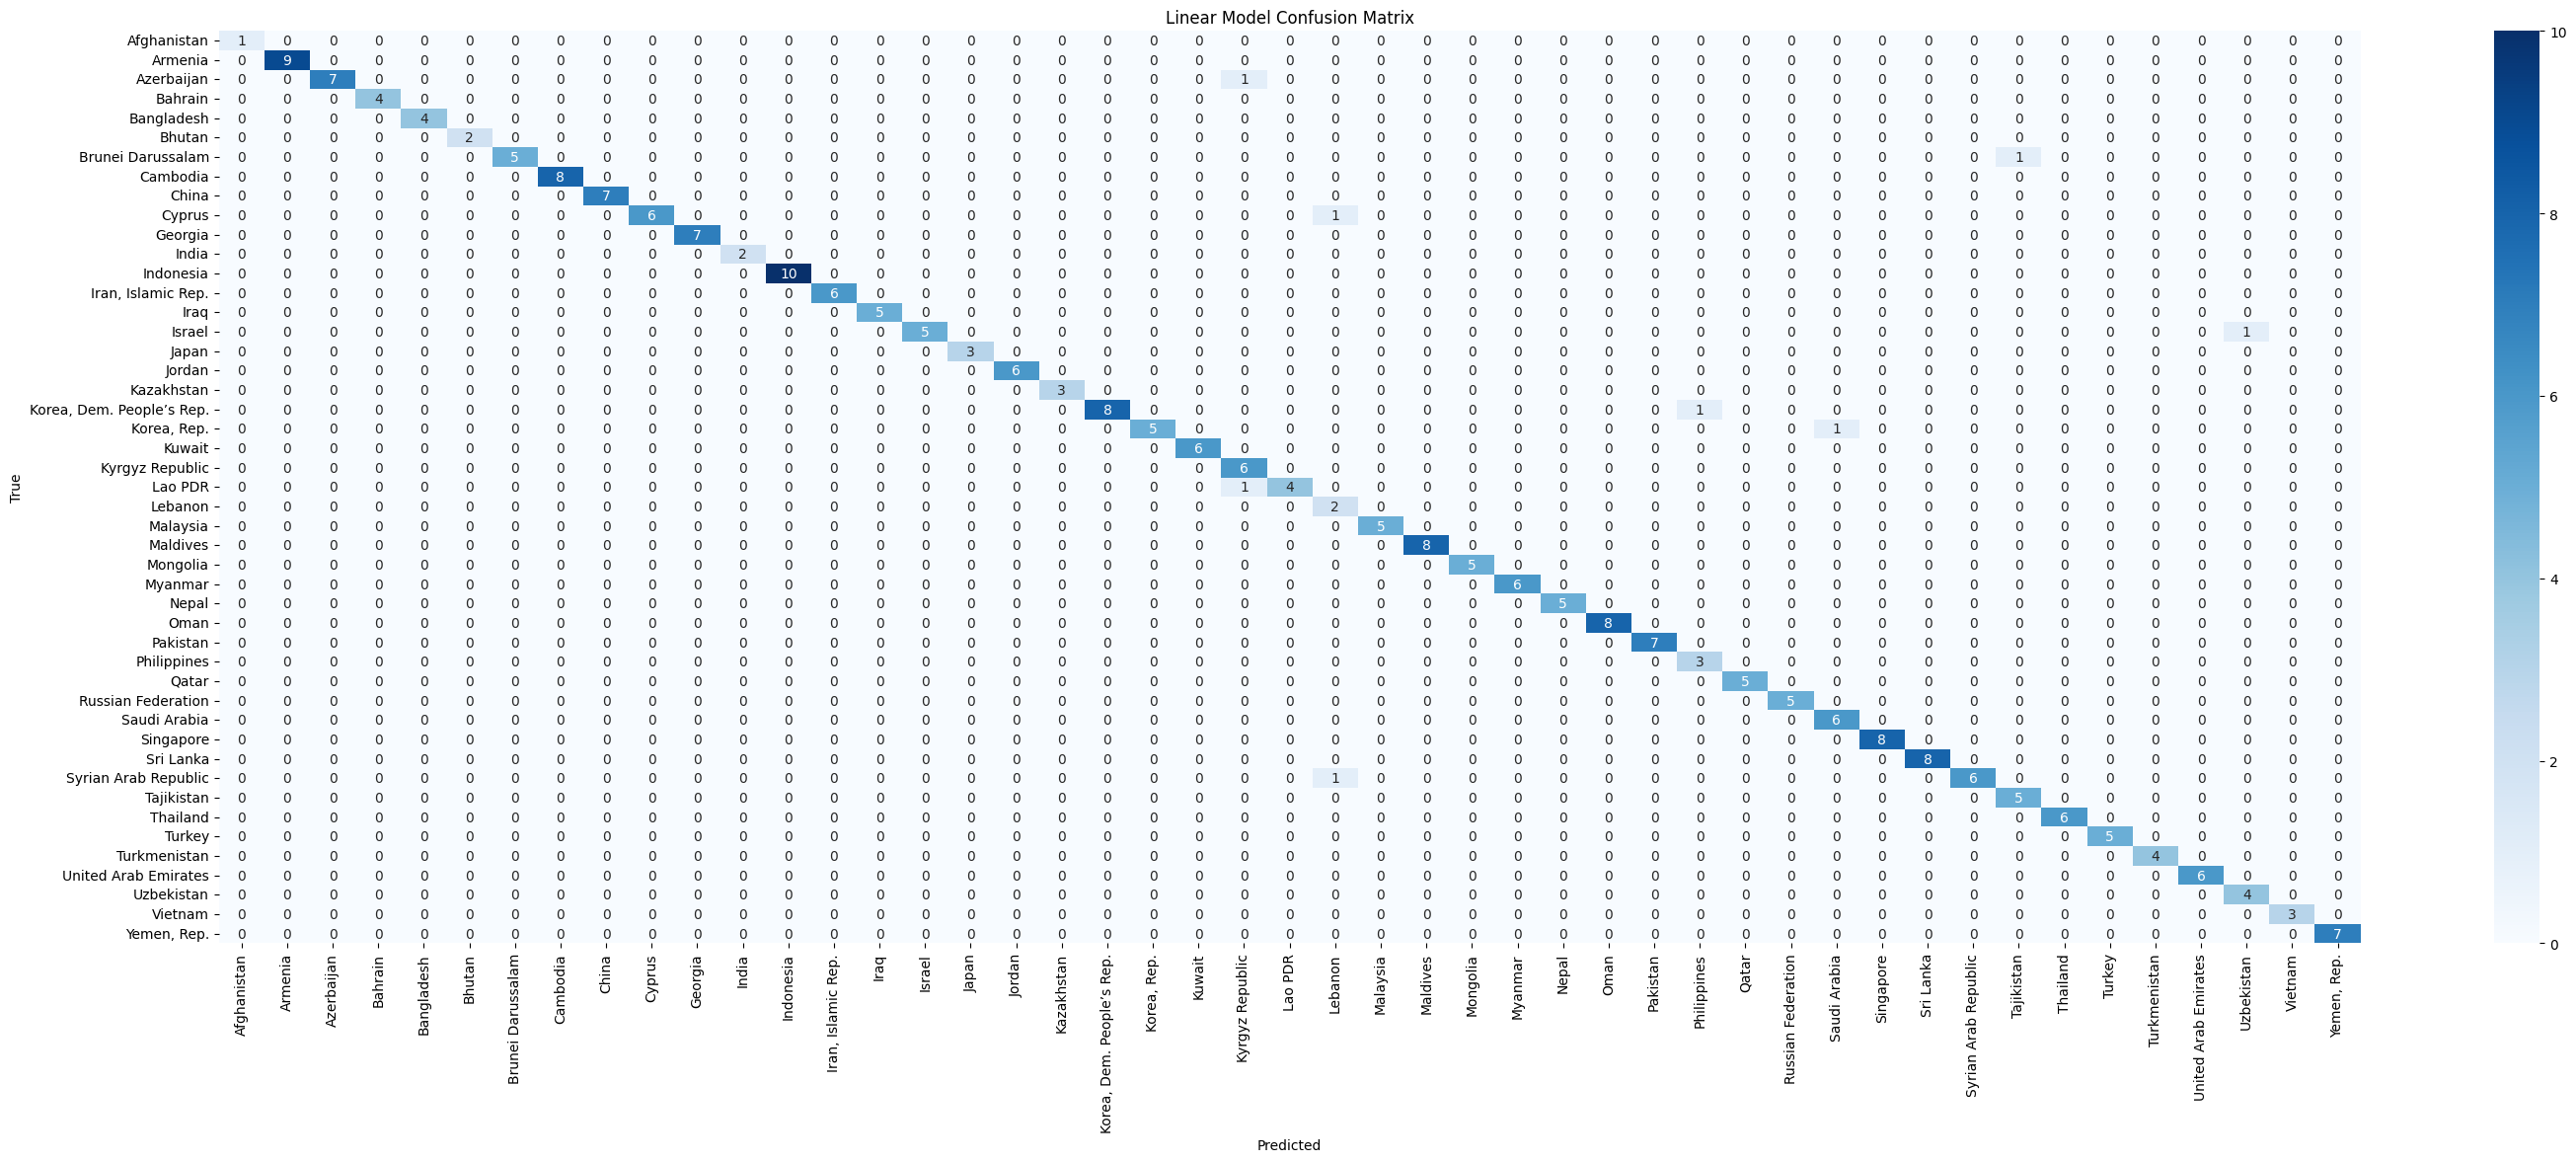

In [ ]:
# training model
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

linear_accuracy, linear_report, y_pred = evaluate_model(linear_model, X_test, y_test)
print("Linear Model Accuracy:", linear_accuracy)
print("Linear Model Report:\n", linear_report)
linear_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(35, 12))

plot_confusion_matrix(linear_cm, classes=list_label, title='Linear Model Confusion Matrix')

plt.show()


Decision Tree Model Accuracy: 0.9393939393939394
Decision Tree Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       0.83      0.83      0.83         6
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         6
          14       0.83      1.00      0.91         5
          15       1.00      0.83      0.91         6
  

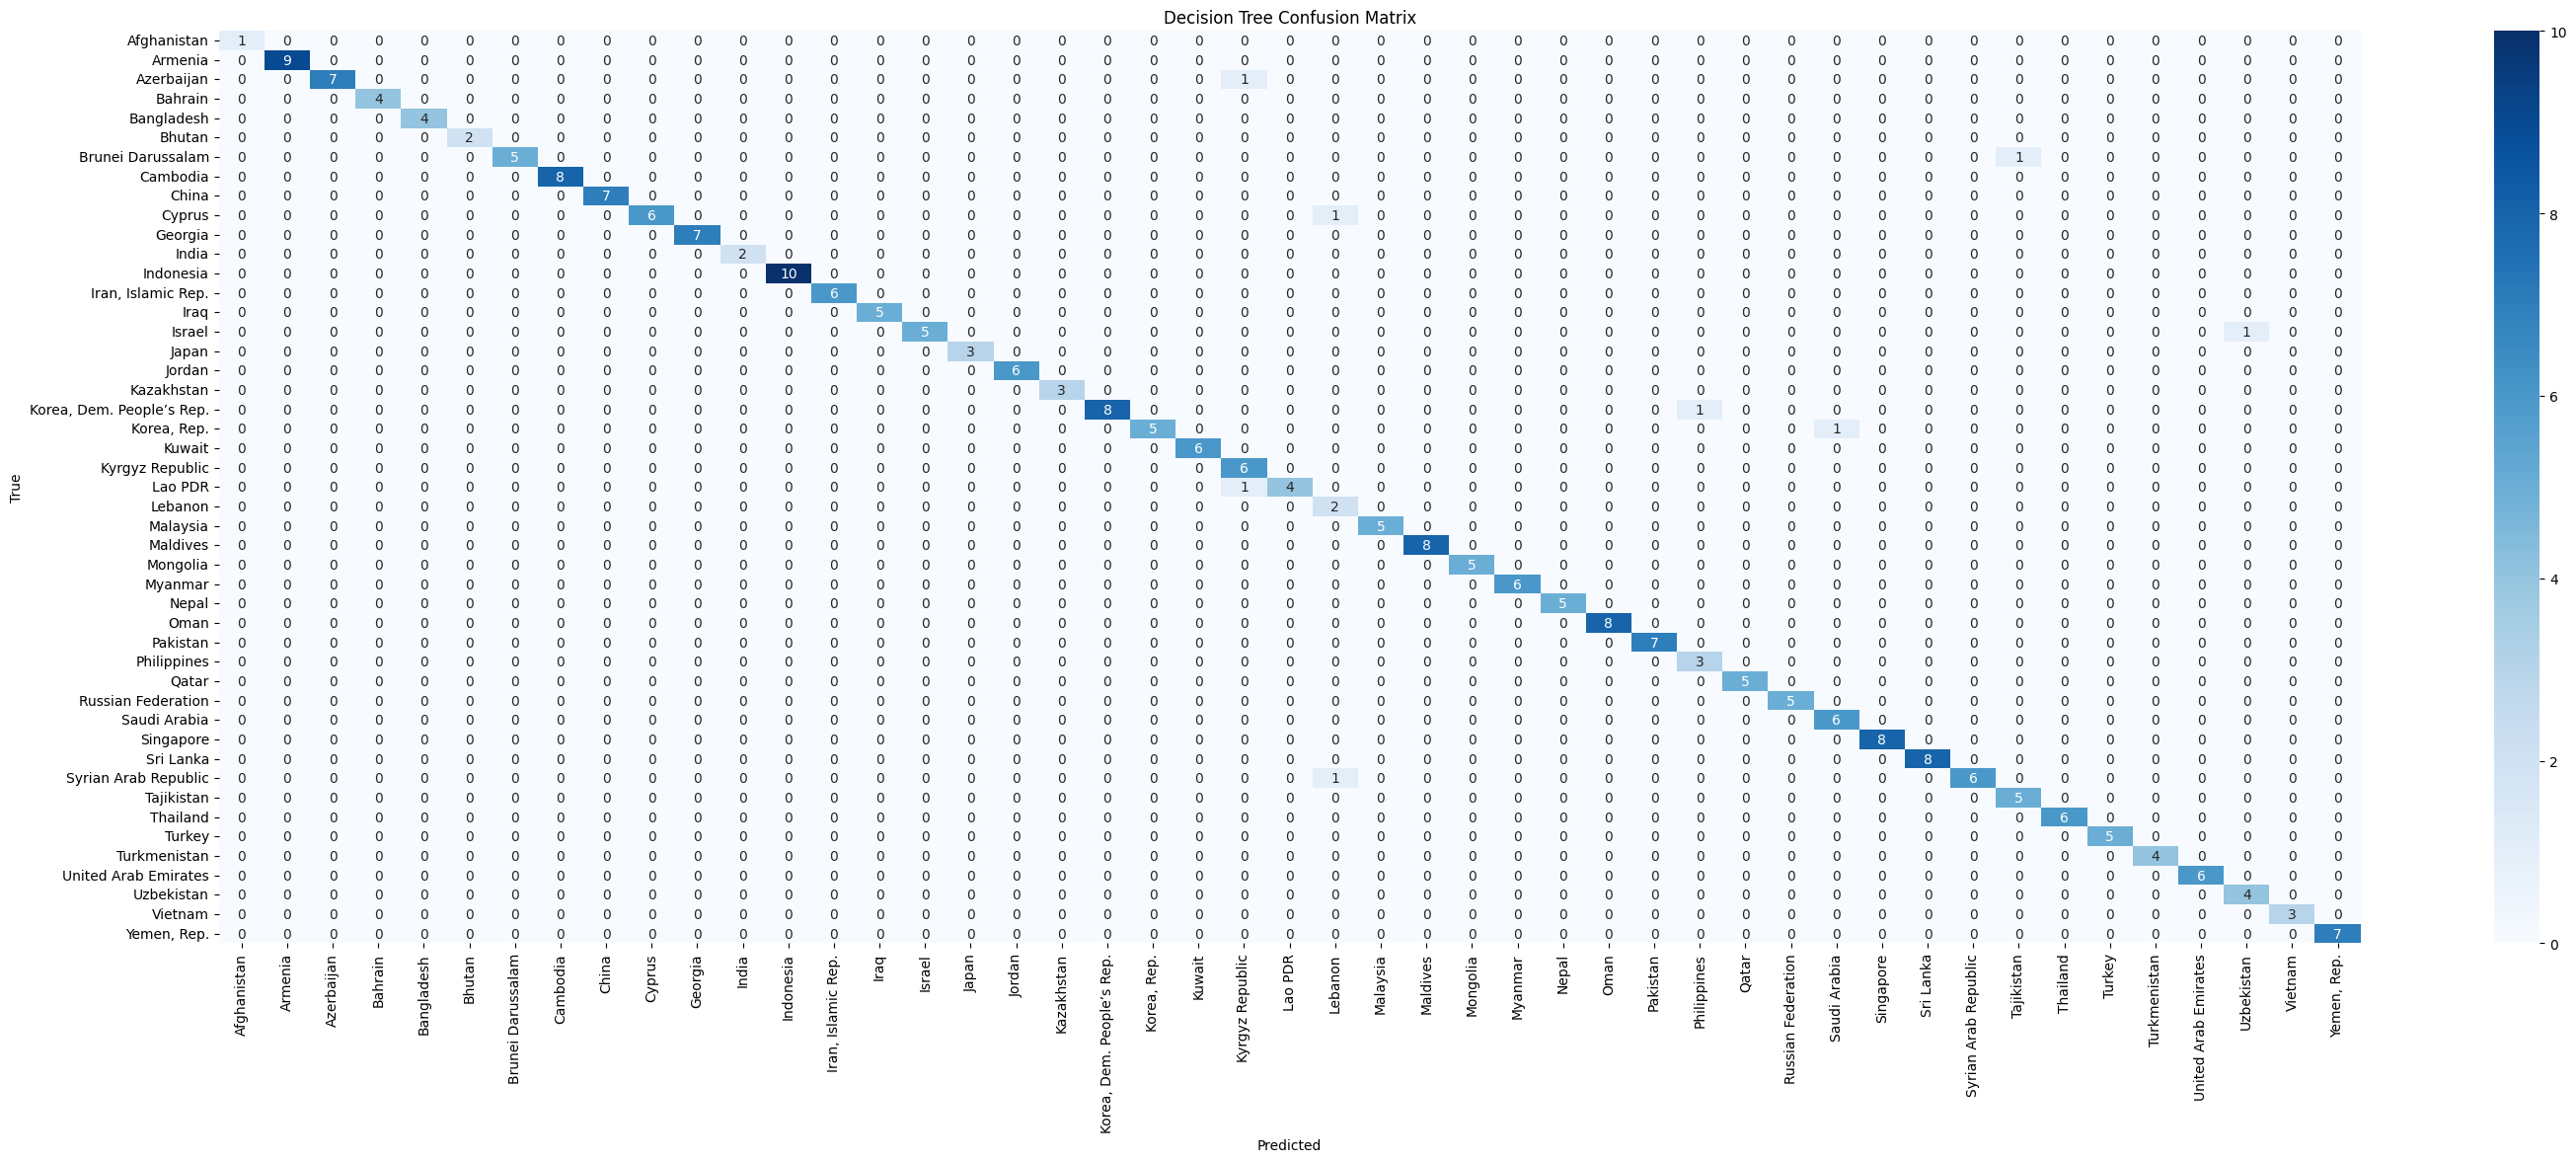

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_accuracy, tree_report, y_pred = evaluate_model(tree_model, X_test, y_test)
print("\nDecision Tree Model Accuracy:", tree_accuracy)
print("Decision Tree Model Report:\n", tree_report)
tree_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(35, 12))

plot_confusion_matrix(linear_cm, classes=list_label, title='Decision Tree Confusion Matrix')

plt.show()


Random Forest Model Accuracy: 0.9772727272727273
Random Forest Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.83      0.91         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5
          15       1.00      0.83      0.91         6
  

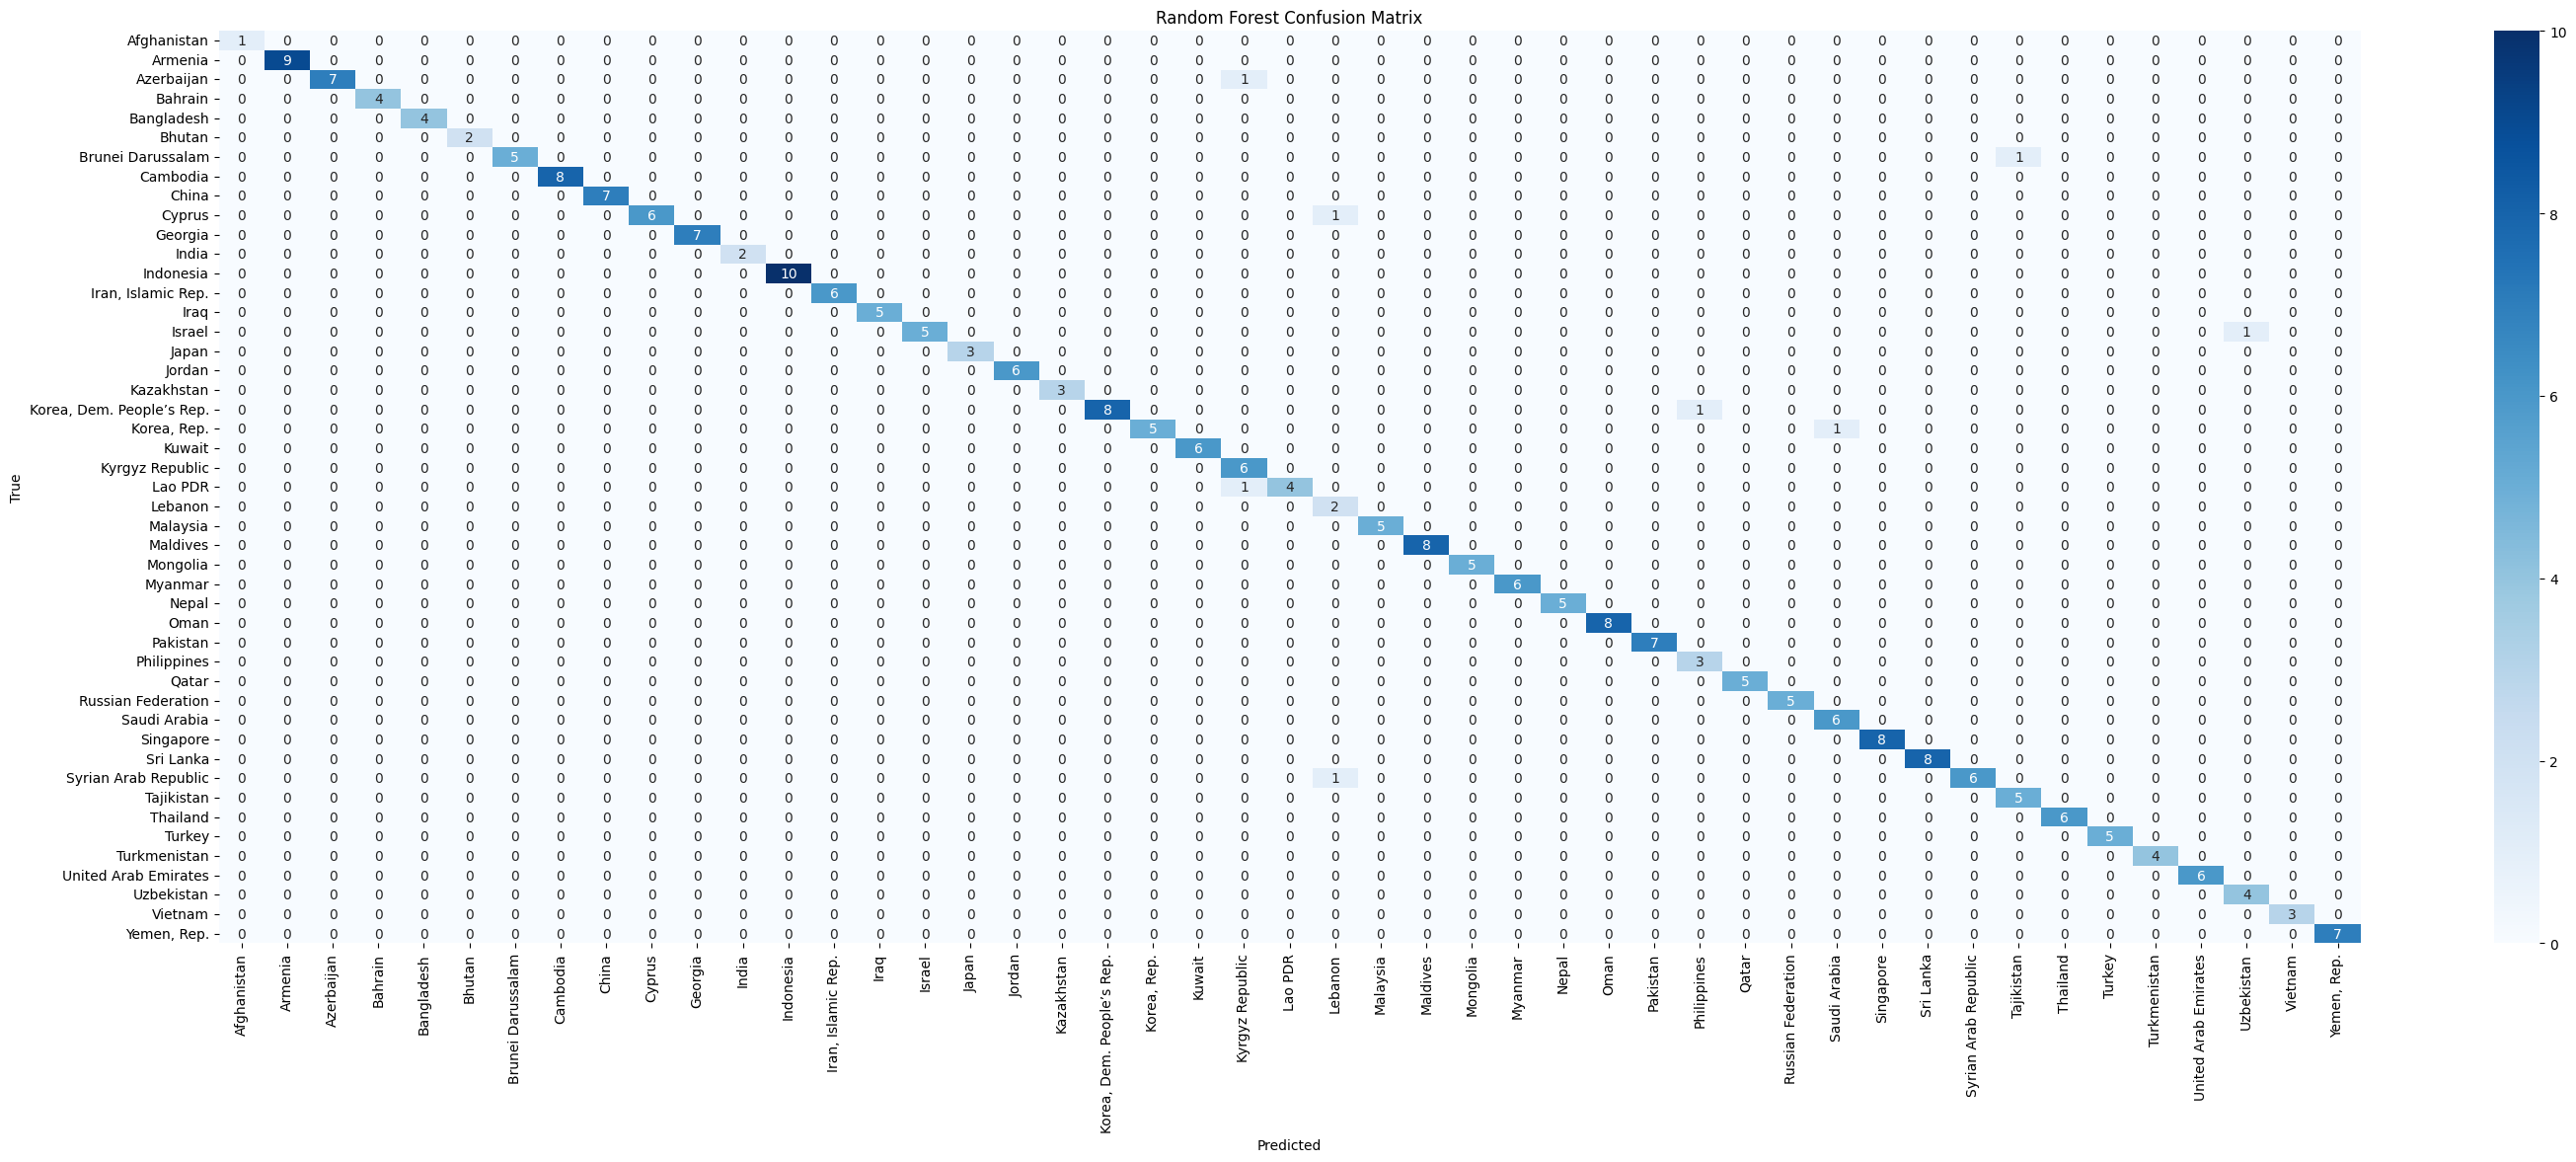

In [ ]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

forest_accuracy, forest_report, y_pred = evaluate_model(forest_model, X_test, y_test)

print("\nRandom Forest Model Accuracy:", forest_accuracy)
print("Random Forest Model Report:\n", forest_report)
forest_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(35, 12))

plot_confusion_matrix(linear_cm, classes=list_label, title='Random Forest Confusion Matrix')

plt.show()